In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [6]:
import requests
requests.__version__

'2.22.0'

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a3f2c11f2cca3308706ab0b65f0f8678


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a3f2c11f2cca3308706ab0b65f0f8678&q=Boston


In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
#Get the City Weather Data

In [12]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import requests
from datetime import datetime

from config import weather_api_key

#Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [13]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [14]:
# Add the latitudes and longitudes to a a list.
coordinates = list(lat_lngs)

In [15]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

586

In [16]:
url = f"http://api.openweathermap.org/data/2.5/weather?unit=Imperial&APPID={weather_api_key}"

In [17]:
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i>= 50):
        set_count +=1
        record_count = 1
    # Create endpoint URL with each city
    city_url = f'{url}&q={city.replace(" ", "+")}'
    
    
    #Log the url record and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to record count
    record_count +=1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | conde
Processing Record 2 of Set 1 | tuskegee
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | bengkulu
Processing Record 6 of Set 1 | geraldton
Processing Record 7 of Set 1 | whitehorse
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | baiao
Processing Record 10 of Set 1 | soto
Processing Record 11 of Set 1 | pangnirtung
Processing Record 12 of Set 1 | ponta do sol
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | narsaq
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | severo-kurilsk
Processing Record 21 of Set 1 | kahului
Processing Record 22 of Set 1 | shihezi
Processing Record 23 of Set 1 | arraial do

Processing Record 41 of Set 4 | bitung
Processing Record 42 of Set 4 | lorengau
Processing Record 43 of Set 4 | georgetown
Processing Record 44 of Set 4 | banjar
Processing Record 45 of Set 4 | san rafael
Processing Record 46 of Set 4 | rawannawi
City not found. Skipping...
Processing Record 47 of Set 4 | amderma
City not found. Skipping...
Processing Record 48 of Set 4 | flinders
Processing Record 49 of Set 4 | kuopio
Processing Record 50 of Set 4 | nikolskoye
Processing Record 1 of Set 5 | ancud
Processing Record 2 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 5 | ushtobe
Processing Record 4 of Set 5 | saskylakh
Processing Record 5 of Set 5 | inuvik
Processing Record 6 of Set 5 | tilichiki
Processing Record 7 of Set 5 | victoria
Processing Record 8 of Set 5 | shepsi
Processing Record 9 of Set 5 | trelew
Processing Record 10 of Set 5 | seoul
Processing Record 11 of Set 5 | deputatskiy
Processing Record 12 of Set 5 | salalah
Processing Record 13 of Set

Processing Record 33 of Set 8 | mehamn
Processing Record 34 of Set 8 | manta
Processing Record 35 of Set 8 | kitami
Processing Record 36 of Set 8 | qaqortoq
Processing Record 37 of Set 8 | san rafael del sur
Processing Record 38 of Set 8 | abay
Processing Record 39 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 40 of Set 8 | xapuri
Processing Record 41 of Set 8 | los llanos de aridane
Processing Record 42 of Set 8 | simpang
Processing Record 43 of Set 8 | codrington
Processing Record 44 of Set 8 | prince rupert
Processing Record 45 of Set 8 | tougue
Processing Record 46 of Set 8 | kraslava
Processing Record 47 of Set 8 | haines junction
Processing Record 48 of Set 8 | snyder
Processing Record 49 of Set 8 | karratha
Processing Record 50 of Set 8 | quang ngai
Processing Record 1 of Set 9 | lima
Processing Record 2 of Set 9 | estelle
Processing Record 3 of Set 9 | kulhudhuffushi
Processing Record 4 of Set 9 | saint-augustin
Processing Record 5 of Set 9 | shimoda
Process

Processing Record 22 of Set 12 | cockburn town
Processing Record 23 of Set 12 | saleaula
City not found. Skipping...
Processing Record 24 of Set 12 | havre-saint-pierre
Processing Record 25 of Set 12 | fort atkinson
Processing Record 26 of Set 12 | roald
Processing Record 27 of Set 12 | katangli
Processing Record 28 of Set 12 | bacuit
City not found. Skipping...
Processing Record 29 of Set 12 | montagnana
Processing Record 30 of Set 12 | shelburne
Processing Record 31 of Set 12 | dingle
Processing Record 32 of Set 12 | cumpas
Processing Record 33 of Set 12 | fukue
Processing Record 34 of Set 12 | predivinsk
Processing Record 35 of Set 12 | angoram
Processing Record 36 of Set 12 | corinto
-----------------------------
Data Retrieval Complete      
-----------------------------


In [18]:
len(city_data)

542

In [19]:
city_data

[{'City': 'Conde',
  'Lat': -7.26,
  'Lng': -34.91,
  'Max Temp': 296.15,
  'Humidity': 88,
  'Cloudiness': 20,
  'Wind Speed': 2.6,
  'Country': 'BR',
  'Date': '2020-06-25 02:18:20'},
 {'City': 'Tuskegee',
  'Lat': 32.42,
  'Lng': -85.69,
  'Max Temp': 295.37,
  'Humidity': 100,
  'Cloudiness': 100,
  'Wind Speed': 2.24,
  'Country': 'US',
  'Date': '2020-06-25 02:18:20'},
 {'City': 'Butaritari',
  'Lat': 3.07,
  'Lng': 172.79,
  'Max Temp': 302.14,
  'Humidity': 75,
  'Cloudiness': 32,
  'Wind Speed': 5.8,
  'Country': 'KI',
  'Date': '2020-06-25 02:18:21'},
 {'City': 'Vaini',
  'Lat': -21.2,
  'Lng': -175.2,
  'Max Temp': 298.15,
  'Humidity': 73,
  'Cloudiness': 75,
  'Wind Speed': 3.6,
  'Country': 'TO',
  'Date': '2020-06-25 02:18:21'},
 {'City': 'Bengkulu',
  'Lat': -3.8,
  'Lng': 102.27,
  'Max Temp': 301.05,
  'Humidity': 63,
  'Cloudiness': 13,
  'Wind Speed': 0.4,
  'Country': 'ID',
  'Date': '2020-06-25 02:18:21'},
 {'City': 'Geraldton',
  'Lat': -28.77,
  'Lng': 114.6,
  

In [20]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Conde,-7.26,-34.91,296.15,88,20,2.60,BR,2020-06-25 02:18:20
1,Tuskegee,32.42,-85.69,295.37,100,100,2.24,US,2020-06-25 02:18:20
2,Butaritari,3.07,172.79,302.14,75,32,5.80,KI,2020-06-25 02:18:21
3,Vaini,-21.20,-175.20,298.15,73,75,3.60,TO,2020-06-25 02:18:21
4,Bengkulu,-3.80,102.27,301.05,63,13,0.40,ID,2020-06-25 02:18:21


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [23]:
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Conde,-7.26,-34.91,296.15,88,20,2.60,BR,2020-06-25 02:18:20
1,1,Tuskegee,32.42,-85.69,295.37,100,100,2.24,US,2020-06-25 02:18:20
2,2,Butaritari,3.07,172.79,302.14,75,32,5.80,KI,2020-06-25 02:18:21
3,3,Vaini,-21.20,-175.20,298.15,73,75,3.60,TO,2020-06-25 02:18:21
4,4,Bengkulu,-3.80,102.27,301.05,63,13,0.40,ID,2020-06-25 02:18:21


In [24]:
city_data_df.count()

City_ID       542
City          542
Lat           542
Lng           542
Max Temp      542
Humidity      542
Cloudiness    542
Wind Speed    542
Country       539
Date          542
dtype: int64

In [25]:
import time

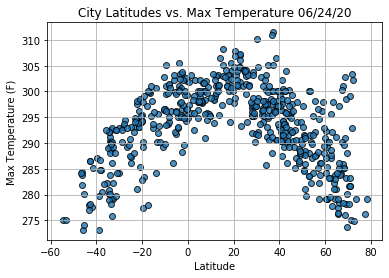

In [26]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, max_temps, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f'City Latitudes vs. Max Temperature {time.strftime("%x")}')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig1.png")
plt.show()

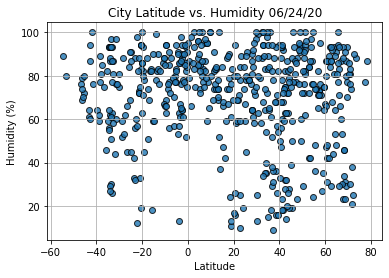

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


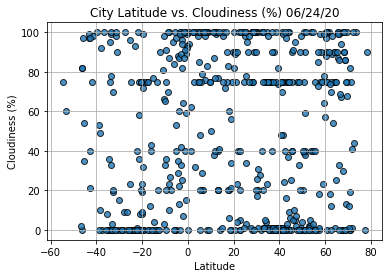

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

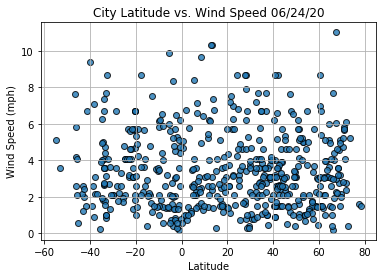

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [30]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [31]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [32]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [33]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

In [34]:
regress_values

[73.68973782871005,
 73.05563705897195,
 89.2704995994175,
 76.27143381978658,
 56.750188694278094,
 61.64182320368626,
 81.29894706556718,
 86.00940992647874,
 87.18702564170663,
 63.72529716139714]

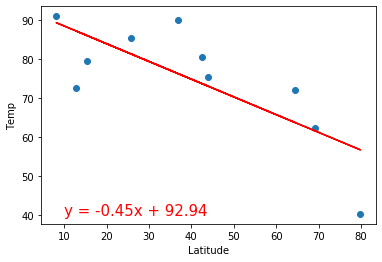

In [35]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [36]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [37]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                       Narsaq
Lat                         60.92
Lng                        -46.05
Max Temp                   279.15
Humidity                       87
Cloudiness                    100
Wind Speed                    1.5
Country                        GL
Date          2020-06-25 02:18:22
Name: 13, dtype: object

In [38]:
city_data_df["Lat"]>=0

0      False
1       True
2       True
3      False
4      False
       ...  
537     True
538     True
539     True
540    False
541     True
Name: Lat, Length: 542, dtype: bool

In [39]:
city_data_df.loc[(city_data_df["Lat"]>=0)]

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,1,Tuskegee,32.42,-85.69,295.37,100,100,2.24,US,2020-06-25 02:18:20
2,2,Butaritari,3.07,172.79,302.14,75,32,5.80,KI,2020-06-25 02:18:21
6,6,Whitehorse,60.72,-135.05,289.15,31,75,8.70,CA,2020-06-25 02:14:35
10,10,Pangnirtung,66.15,-65.71,278.41,83,99,0.20,CA,2020-06-25 02:06:28
11,11,Ponta Do Sol,32.67,-17.10,294.15,68,20,4.10,PT,2020-06-25 02:18:22
...,...,...,...,...,...,...,...,...,...,...
536,536,Dingle,11.00,122.67,303.48,69,100,3.15,PH,2020-06-25 02:19:35
537,537,Cumpas,29.98,-109.78,310.16,13,26,3.95,MX,2020-06-25 02:19:35
538,538,Fukue,32.69,128.84,298.15,100,75,7.20,JP,2020-06-25 02:19:35
539,539,Predivinsk,57.07,93.44,296.62,65,73,1.72,RU,2020-06-25 02:19:35


In [40]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [41]:
southern_hemi_df

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Conde,-7.26,-34.91,296.15,88,20,2.60,BR,2020-06-25 02:18:20
3,3,Vaini,-21.20,-175.20,298.15,73,75,3.60,TO,2020-06-25 02:18:21
4,4,Bengkulu,-3.80,102.27,301.05,63,13,0.40,ID,2020-06-25 02:18:21
5,5,Geraldton,-28.77,114.60,290.15,59,0,6.70,AU,2020-06-25 02:18:21
7,7,Bredasdorp,-34.53,20.04,280.15,93,0,1.84,ZA,2020-06-25 02:18:21
...,...,...,...,...,...,...,...,...,...,...
518,518,Azul,-36.78,-59.86,282.04,75,100,2.15,AR,2020-06-25 02:16:00
523,523,Mouila,-1.87,11.06,294.80,90,87,0.58,GA,2020-06-25 02:19:32
524,524,Kununurra,-15.77,128.73,298.15,18,0,4.10,AU,2020-06-25 02:19:33
526,526,Lithgow,-33.48,150.15,289.82,61,33,4.40,AU,2020-06-25 02:19:33


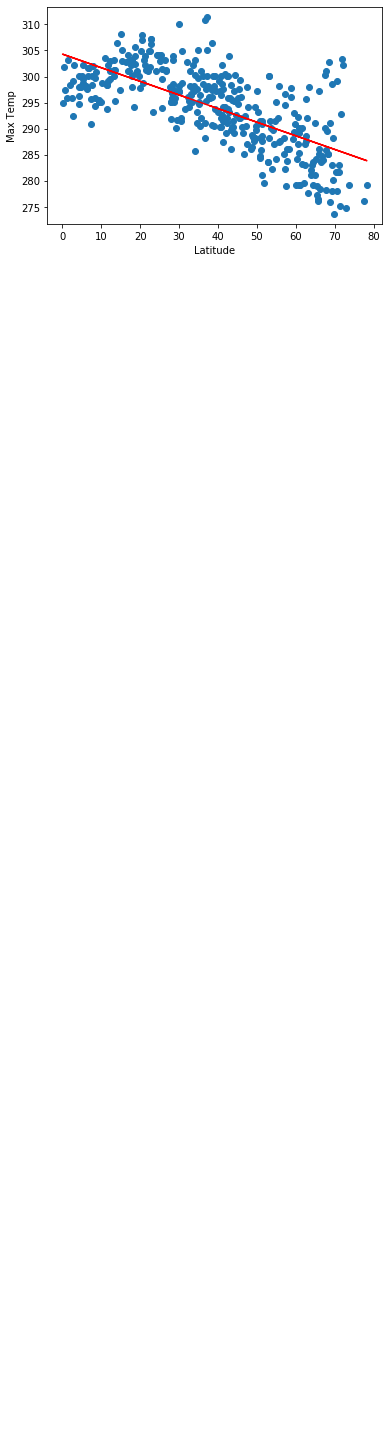

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

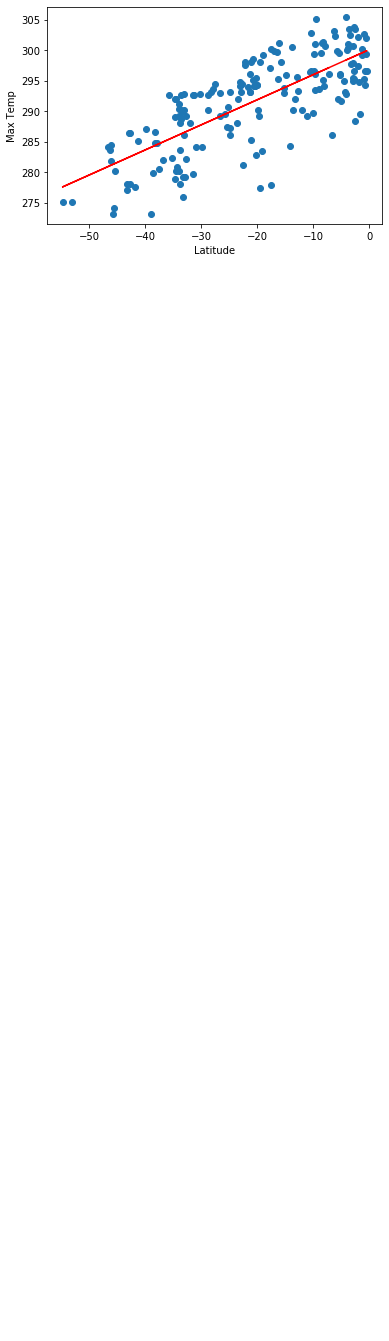

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

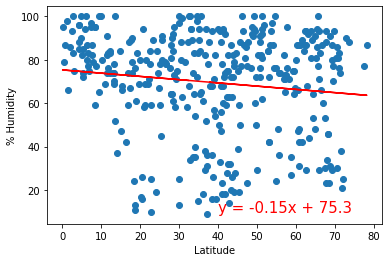

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

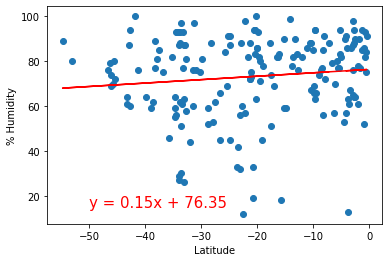

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

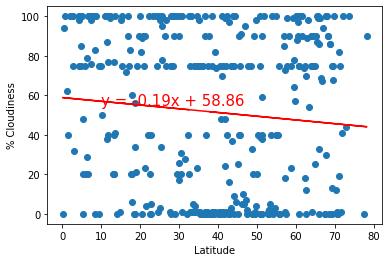

In [46]:
# Correlation between latitude and % Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for % Cloudiness', "% Cloudiness",(10,55))

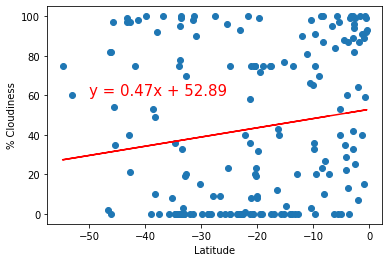

In [47]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for % Cloudiness', "% Cloudiness",(-50,60))

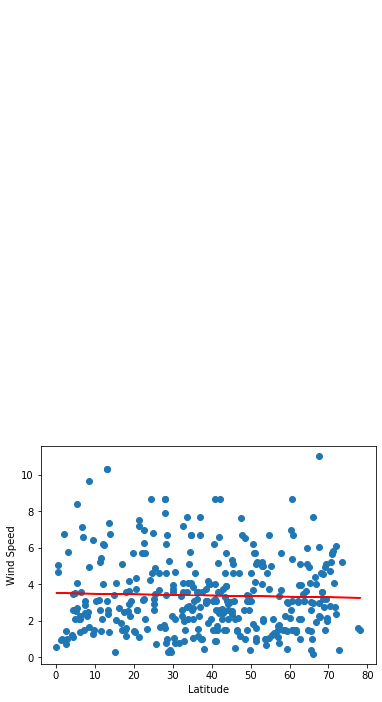

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

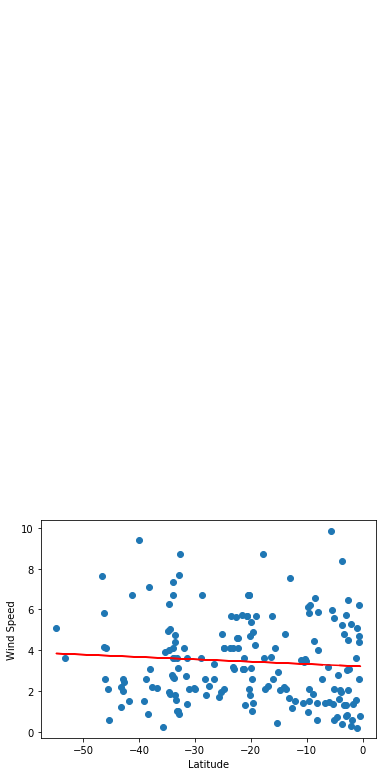

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))

In [50]:
!pip install gmaps

In [51]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

In [52]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Conde,-7.26,-34.91,296.15,88,20,2.60,BR,2020-06-25 02:18:20
1,1,Tuskegee,32.42,-85.69,295.37,100,100,2.24,US,2020-06-25 02:18:20
2,2,Butaritari,3.07,172.79,302.14,75,32,5.80,KI,2020-06-25 02:18:21
3,3,Vaini,-21.20,-175.20,298.15,73,75,3.60,TO,2020-06-25 02:18:21
4,4,Bengkulu,-3.80,102.27,301.05,63,13,0.40,ID,2020-06-25 02:18:21


In [53]:
city_data_df.dtypes

City_ID         int64
City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date           object
dtype: object

In [54]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [55]:
# 1. Assign the locations to an array of latitude and longitude pairs.
locations = city_data_df[["Lat", "Lng"]]
# 2. Assign the weights variable to some values.
temperatures = city_data_df["Max Temp"]
# 3. Assign the figure variable to the gmaps.figure() attribute.
fig = gmaps.figure()
# 4. Assign the heatmap_layer variable to the heatmap_layer attribute and add in the locations.
heatmap_layer = gmaps.heatmap_layer(locations, weights=temperatures)

# 5. Add the heatmap layer.
fig.add_layer(heatmap_layer)
# 6. Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [59]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=temps)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [57]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

In [58]:
temps

[296.15,
 295.37,
 302.14,
 298.15,
 301.05,
 290.15,
 289.15,
 280.15,
 296.56,
 282.15,
 278.41,
 294.15,
 280.93,
 279.15,
 286.15,
 292.59,
 275.15,
 294.26,
 295.93,
 284.8,
 303.15,
 300.31,
 293.15,
 301.15,
 283.71,
 299.45,
 301.06,
 294.8,
 290.37,
 280.54,
 294.26,
 295.15,
 301.15,
 298.71,
 300.15,
 292.89,
 293.6,
 301.98,
 275.15,
 281.66,
 289.15,
 280.14,
 296.15,
 300.13,
 284.41,
 303.41,
 273.64,
 288.71,
 293.15,
 298.15,
 300.15,
 284.82,
 281.09,
 290.26,
 276.14,
 299.82,
 300.15,
 280.15,
 295.22,
 294.26,
 287.19,
 292.89,
 279.21,
 297.41,
 285.15,
 307.15,
 279.15,
 296.15,
 288.15,
 299.15,
 294.15,
 303.15,
 301.15,
 293.15,
 292.95,
 288.15,
 291.05,
 300.6,
 297.78,
 291.25,
 284.15,
 307.94,
 298.15,
 304.82,
 285.88,
 279.26,
 303.85,
 298.15,
 286.48,
 293.15,
 284.15,
 301.87,
 275.97,
 298.55,
 292.49,
 303.92,
 289.82,
 283.71,
 295.01,
 300.15,
 301.16,
 300.84,
 295.85,
 294.26,
 285.74,
 296.77,
 283.77,
 292.15,
 297.59,
 294.15,
 307.22,
 298.

In [61]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [62]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [63]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [74]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 100
What is the maximum temperature you would like for your trip? 400


In [75]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Conde,-7.26,-34.91,296.15,88,20,2.60,BR,2020-06-25 02:18:20
1,1,Tuskegee,32.42,-85.69,295.37,100,100,2.24,US,2020-06-25 02:18:20
2,2,Butaritari,3.07,172.79,302.14,75,32,5.80,KI,2020-06-25 02:18:21
3,3,Vaini,-21.20,-175.20,298.15,73,75,3.60,TO,2020-06-25 02:18:21
4,4,Bengkulu,-3.80,102.27,301.05,63,13,0.40,ID,2020-06-25 02:18:21
5,5,Geraldton,-28.77,114.60,290.15,59,0,6.70,AU,2020-06-25 02:18:21
6,6,Whitehorse,60.72,-135.05,289.15,31,75,8.70,CA,2020-06-25 02:14:35
7,7,Bredasdorp,-34.53,20.04,280.15,93,0,1.84,ZA,2020-06-25 02:18:21
8,8,Baiao,-2.79,-49.67,296.56,94,96,0.82,BR,2020-06-25 02:18:22
9,9,Soto,-32.81,-61.40,282.15,81,70,7.70,AR,2020-06-25 02:18:22


In [76]:
preferred_cities_df.count()

City_ID       542
City          542
Lat           542
Lng           542
Max Temp      542
Humidity      542
Cloudiness    542
Wind Speed    542
Country       539
Date          542
dtype: int64

In [77]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Conde,BR,296.15,-7.26,-34.91,
1,Tuskegee,US,295.37,32.42,-85.69,
2,Butaritari,KI,302.14,3.07,172.79,
3,Vaini,TO,298.15,-21.20,-175.20,
4,Bengkulu,ID,301.05,-3.80,102.27,
5,Geraldton,AU,290.15,-28.77,114.60,
6,Whitehorse,CA,289.15,60.72,-135.05,
7,Bredasdorp,ZA,280.15,-34.53,20.04,
8,Baiao,BR,296.56,-2.79,-49.67,
9,Soto,AR,282.15,-32.81,-61.40,


In [79]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

for index, row in hotel_df.iterrows():
    # get lat, lng from df
    lat = row["Lat"]
    lng = row["Lng"]
    
    params["location"] = f"{lat},{lng}"
    
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params).json()
    
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except:
        print("Hotel not found")

Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found
Hotel not found


In [80]:
hotel_df

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Conde,BR,296.15,-7.26,-34.91,Pousada Beija Flor
1,Tuskegee,US,295.37,32.42,-85.69,Kellogg Hotel & Conference Center
2,Butaritari,KI,302.14,3.07,172.79,Isles Sunset Lodge
3,Vaini,TO,298.15,-21.20,-175.20,Keleti Beach Resort
4,Bengkulu,ID,301.05,-3.80,102.27,Grage Hotel Bengkulu
...,...,...,...,...,...,...
537,Cumpas,MX,310.16,29.98,-109.78,Hotel La Palma
538,Fukue,JP,298.15,32.69,128.84,Goto Guesthouse Utojuku & SA Car Rental
539,Predivinsk,RU,296.62,57.07,93.44,
540,Angoram,PG,305.54,-4.06,144.07,


In [81]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, 
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [85]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))